In [118]:
%reset -f

In [119]:
import networkx as nx
import matplotlib.pyplot as plt

In [120]:
N = 2000
k = 4
N_IC = 20

In [121]:
pList = [0.0001, 0.0002, 0.0004, 0.0006,
         0.001, 0.002, 0.004, 0.008,
         0.015, 0.03, 0.06,
         0.1, 0.2, 0.3, 0.5, 1
        ]

In [122]:
L_list = np.zeros((len(pList), N_IC))
C_list = np.zeros((len(pList), N_IC))

In [123]:
%%time
for ii, p in enumerate(pList):
    for ic in range(N_IC):
        G = nx.watts_strogatz_graph(N, k, p)
        L = nx.average_shortest_path_length(G)
        C = nx.average_clustering(G)
        
        L_list[ii, ic] = L
        C_list[ii, ic] = C
        
        del G, L, C

CPU times: user 1h 51min 1s, sys: 13 s, total: 1h 51min 14s
Wall time: 1h 51min 57s


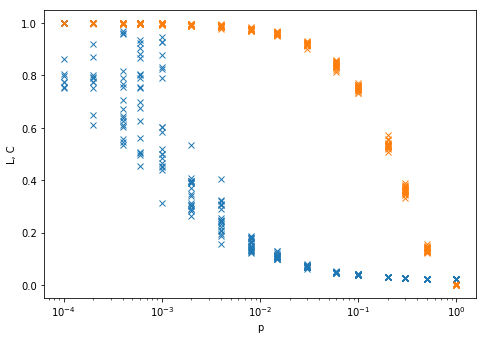

In [127]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for ii, p in enumerate(pList):
    p = pList[ii]
    
    L_ii = L_list[ii,:]/max(L_list[0,:])
    C_ii = C_list[ii,:]/max(C_list[0,:])
    
    for ic in range(1, N_IC):
        ax.plot(p, L_ii[ic], "C0x", fillstyle="none")
        ax.plot(p, C_ii[ic], "C1x", fillstyle="none")

ax.set_xscale("log")

ax.set_ylabel("L, C")
ax.set_xlabel("p")

plt.show()